In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [56]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

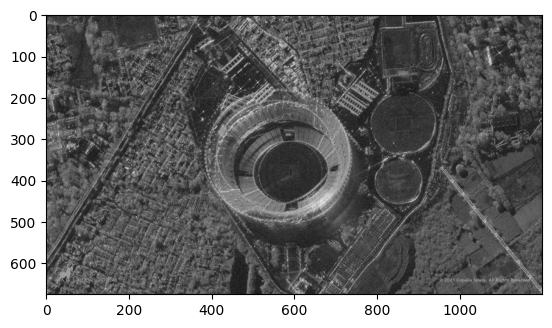

In [57]:
plt.imshow(image_gray, cmap="gray")

In [58]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,   0,  44, ...,   0,  58,   0],
       [  0, 124,   0, ...,  21,   0,   0],
       [102,  84,   0, ...,   0,  14,   0],
       ...,
       [176,  17,  62, ...,   0,   0, 177],
       [  0,   7,  89, ...,  17, 136,   0],
       [  0,   0,  24, ...,   0, 105,   0]],
      shape=(675, 1200), dtype=uint8)

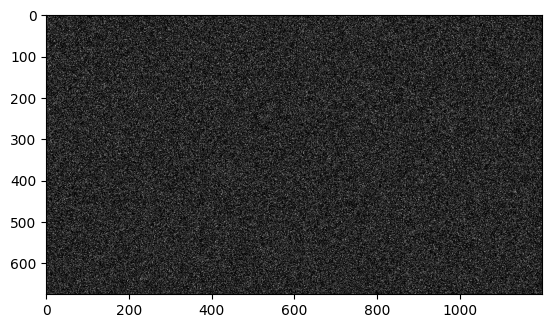

In [59]:
plt.imshow(noise_gauss, cmap="gray")

In [60]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [61]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [62]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

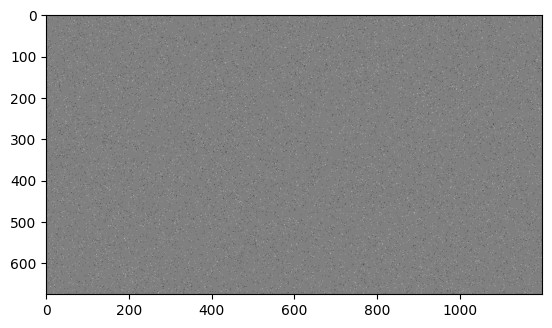

In [63]:
plt.imshow(bg_image, cmap="gray")

In [64]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

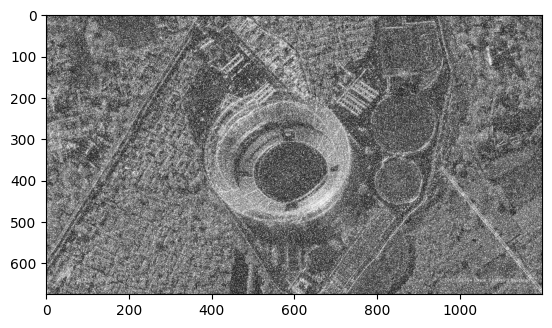

In [65]:
plt.imshow(image_noise_gauss, cmap="gray")

In [66]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4224.838417283951 0.18748705389789316


In [67]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [68]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [69]:
print(mse_gauss_median, ssim_gauss_median)

1027.120498765432 0.4314757083896651


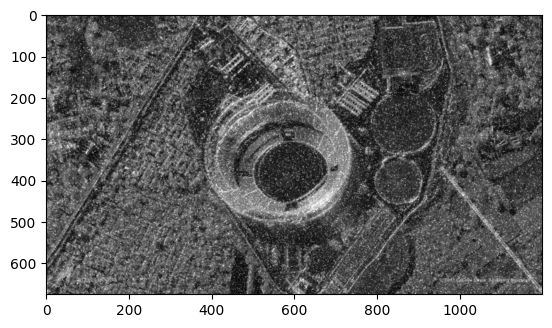

In [70]:
plt.imshow(image_gauss_median, cmap="gray")

In [71]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

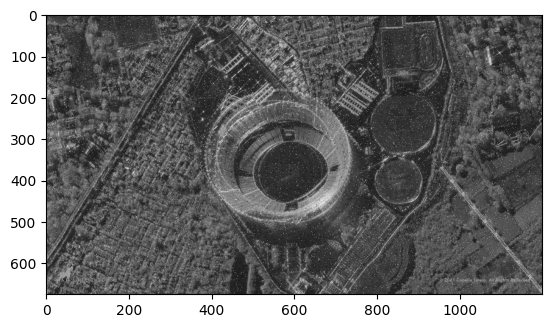

In [72]:
plt.imshow(image_sp, cmap="gray")

In [73]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

393.8149234567901 0.7169576408450128


In [74]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [75]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.9142901234568 0.8160604636061287


# Другие типы фильтров

In [76]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [77]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [78]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [79]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


C:\Users\launm\AppData\Local\Temp\ipykernel_16700\164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


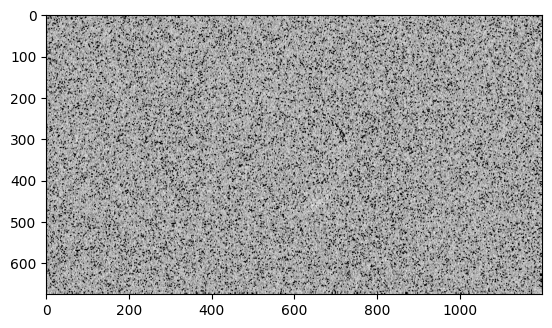

In [80]:
plt.imshow(res, cmap="gray")

In [81]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6550.72725308642 0.027460413153722198



# 2D свертка

In [82]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [83]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [84]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [85]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

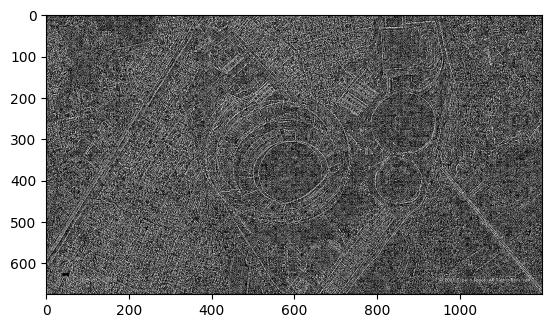

In [86]:
plt.imshow(image_lapl, cmap="gray")

In [87]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.